Regression analysis
1) simple linear regression


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

[[0.5042961]] [-0.63125497]
[[2.84334518]]


c:\Users\Nikhil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Nikhil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


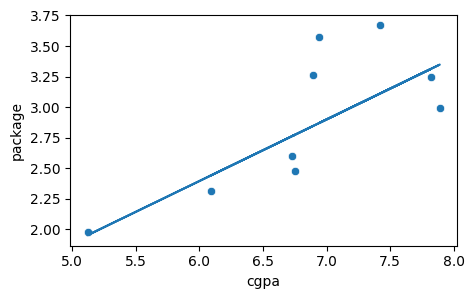

In [ ]:
data=pd.read_csv(r"C:\python\ml\datasets\cgpa.csv")
x=data[["cgpa"]]
y=data[["package"]]
plt.figure(figsize=(5,3))
sns.scatterplot(x="cgpa",y="package",data=data)

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.1,random_state=2)

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(train_x,train_y) # caliculates m and c value and put in y=mx+c
print(lr.coef_,lr.intercept_)
print(lr.predict([[6.89]]) )#checking the output for 6.89 .gives y value by putting x=6.89
lr.score(test_x,test_y)*100 #accuracay

y_predict=lr.predict(x)
plt.plot(data["cgpa"],y_predict)
plt.show()

Multiple linear regression

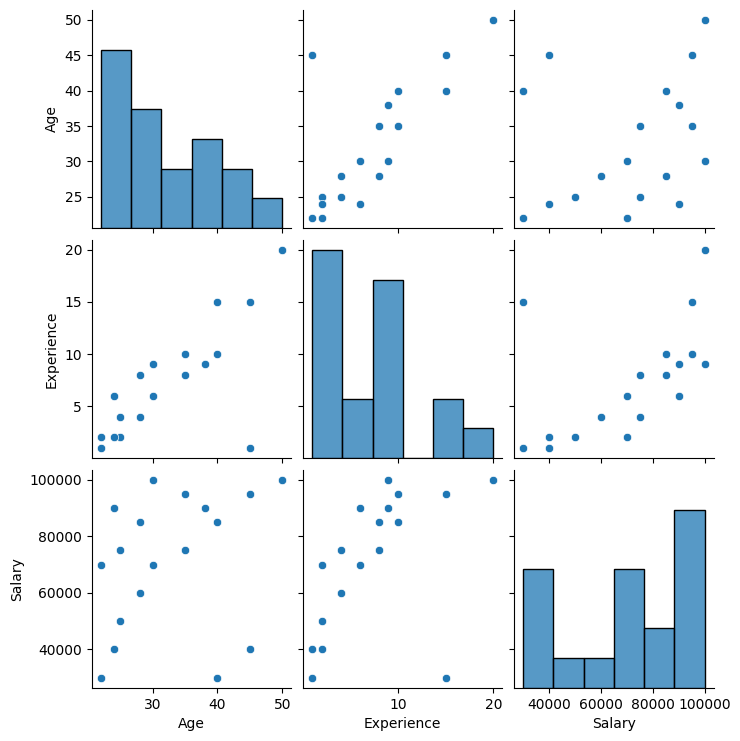

<Axes: >

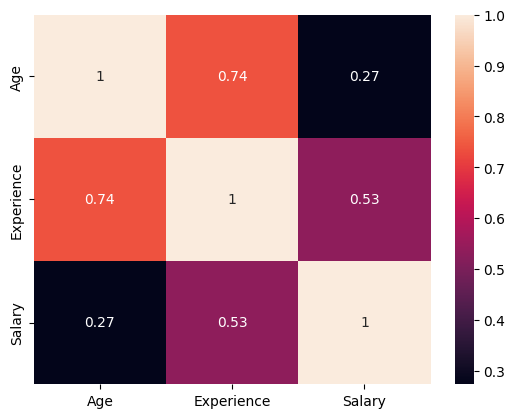

In [3]:
data=pd.read_csv(r'C:\python\ml\datasets\salary.csv')
sns.pairplot(data=data)
plt.show()
sns.heatmap(data=data.corr(),annot=True)


In [4]:
x=data.iloc[:,:-1]
y=data["Salary"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
print(lr.score(x_test,y_test)) #accuracy
lr.coef_ #m1,m2
lr.intercept_#c
lr.predict(x_test) # x_test has 4 rows so output is 4 rows


0.42481219145189064


array([77304.79616005, 65583.41942149, 61513.97777666, 75948.31561177])


Polynomial Regression

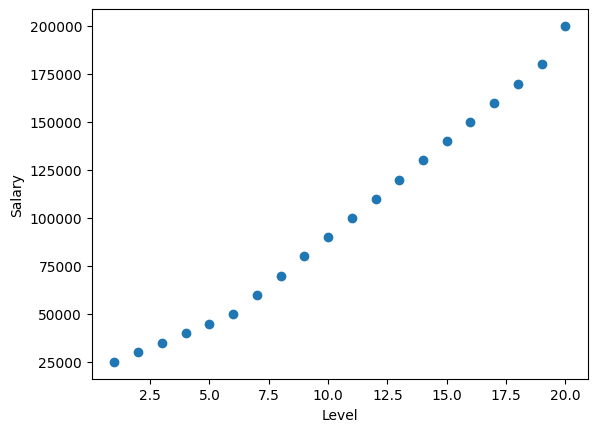

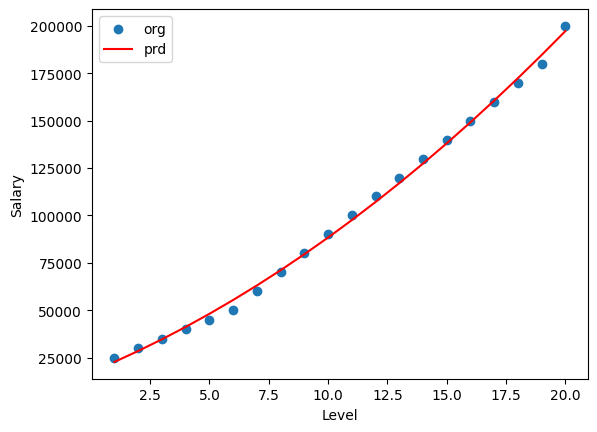

In [ ]:
data=pd.read_csv(r"C:\python\ml\datasets\polynomial.csv")
plt.scatter(data["Level"],data["Salary"])
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()
data.corr()
x=data[["Level"]]
y=data["Salary"]
from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(degree=2)
pf.fit(x)
x=pf.transform(x) # output - [1,a,b,a^2,b^2,...]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)*100
prd=lr.predict(x)
plt.scatter(data["Level"],data["Salary"])
plt.xlabel("Level")
plt.ylabel("Salary")
plt.plot(data["Level"],prd,'r-')
plt.legend(["org","prd"])
plt.show()

In [6]:
test=pf.transform([[15]])
test
lr.predict(test)

c:\Users\Nikhil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([138050.10149133])

lasso and  ridge Regularization 

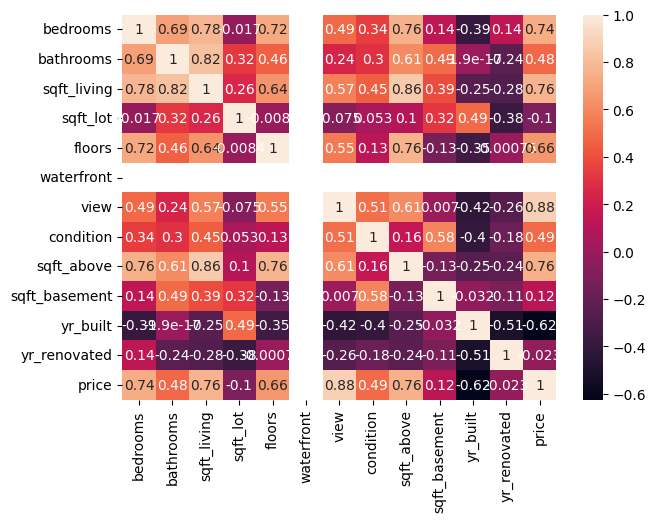

In [7]:
from sklearn.preprocessing import StandardScaler # is used to resize the distribution of values so mean =0 standard dev=1
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,root_mean_squared_error
data=pd.read_csv(r'C:\python\ml\datasets\regularization.csv')
data.head(3)
plt.figure(figsize=(7,5))
sns.heatmap(data=data.corr(),annot=True)
plt.show()
x=data.iloc[:,:-1]
y=data["price"]
sc=StandardScaler()
sc.fit(x)
x=pd.DataFrame(sc.transform(x),columns=x.columns)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)

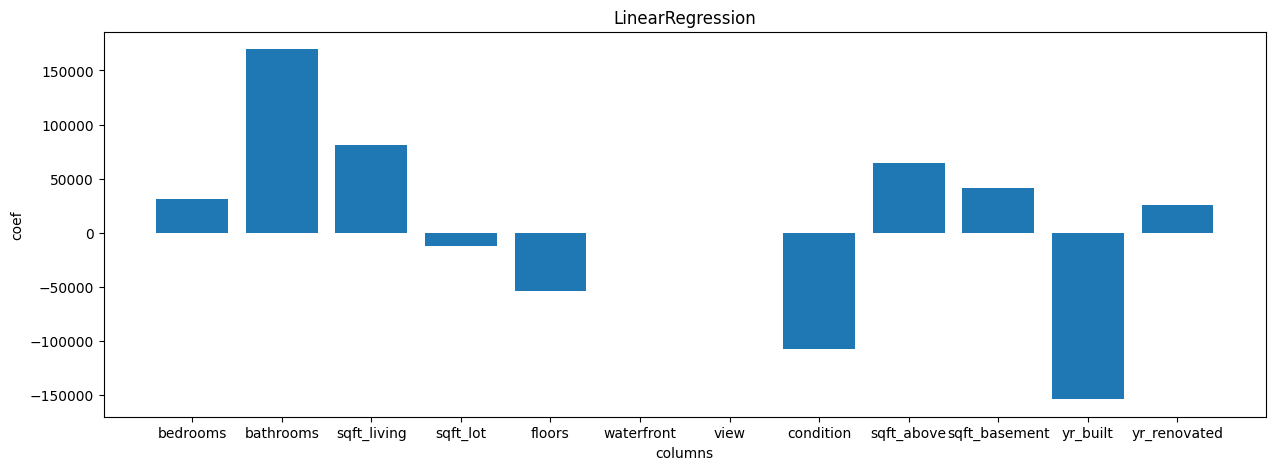

585503807083.4943
572049.8118412846
765182.2051534486


In [8]:
from sklearn.linear_model import LinearRegression , Lasso,Ridge
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)*100
plt.figure(figsize=(15,5))
plt.title("LinearRegression")
plt.xlabel("columns")
plt.ylabel("coef")
plt.bar(x.columns,lr.coef_)
plt.show()
print(mean_squared_error(y_test,lr.predict(x_test)))
print(mean_absolute_error(y_test,lr.predict(x_test)))
print(root_mean_squared_error(y_test,lr.predict(x_test)))

c:\Users\Nikhil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.427e+08, tolerance: 8.206e+07
  model = cd_fast.enet_coordinate_descent(


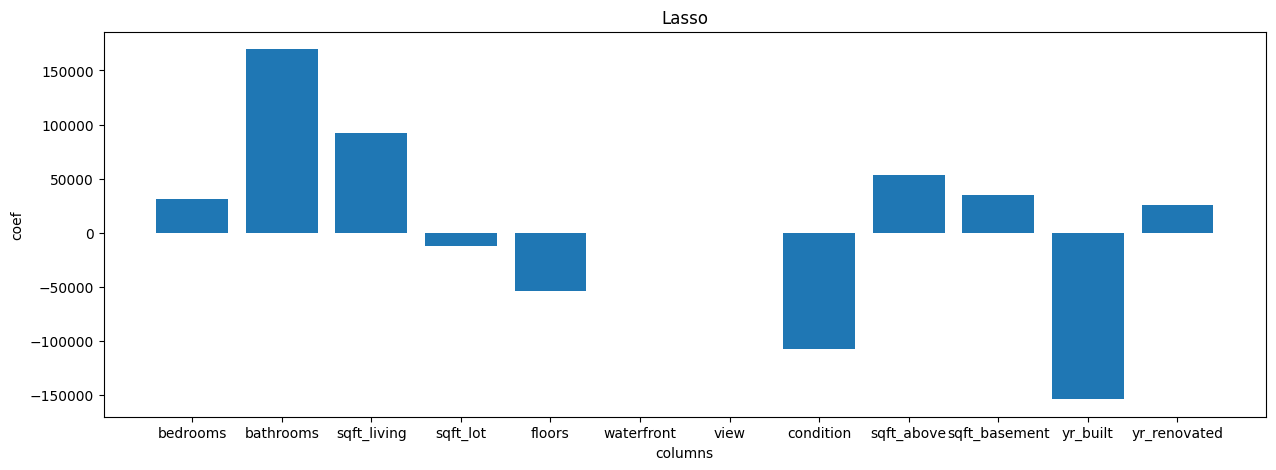

585494760690.249
572041.9210988823
765176.2938632176


In [9]:
#Laso
la=Lasso(alpha=0.5) #alpha = pentaliz corner
la.fit(x_train,y_train)
la.score(x_test,y_test)*100
plt.figure(figsize=(15,5))
plt.title("Lasso")
plt.xlabel("columns")
plt.ylabel("coef")
plt.bar(x.columns,la.coef_)
plt.show()
print(mean_squared_error(y_test,la.predict(x_test)))
print(mean_absolute_error(y_test,la.predict(x_test)))
print(root_mean_squared_error(y_test,la.predict(x_test)))

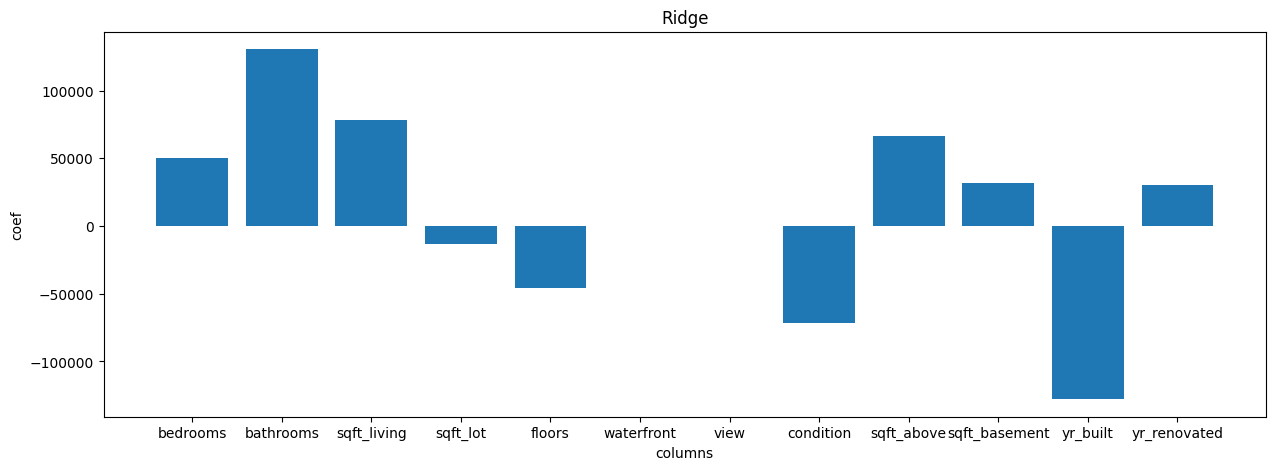

523883439414.28766
512046.5565347113
723797.9271967333


In [10]:
#Ridge
ri=Ridge(alpha=0.5) #alpha = pentaliz corner
ri.fit(x_train,y_train)
ri.score(x_test,y_test)*100
plt.figure(figsize=(15,5))
plt.title("Ridge")
plt.xlabel("columns")
plt.ylabel("coef")
plt.bar(x.columns,ri.coef_)
plt.show()
print(mean_squared_error(y_test,ri.predict(x_test)))
print(mean_absolute_error(y_test,ri.predict(x_test)))
print(root_mean_squared_error(y_test,ri.predict(x_test)))

In [11]:
df=pd.DataFrame({"columns":x.columns,"LinearRegressinon":lr.coef_,"Lasso":la.coef_,"Ridge":ri.coef_})
df

,columns,LinearRegressinon,Lasso,Ridge
0,bedrooms,3.103500e+04,31037.801750,5.001323e+04
1,bathrooms,1.697885e+05,169786.082462,1.306337e+05
2,sqft_living,8.093288e+04,92310.658053,7.832449e+04
3,sqft_lot,-1.205725e+04,-12056.346290,-1.324178e+04
4,floors,-5.360692e+04,-53605.554762,-4.560937e+04
5,waterfront,-3.637979e-11,0.000000,0.000000e+00
6,view,5.924035e-29,0.000000,5.713819e-26
7,condition,-1.074401e+05,-107435.811417,-7.165728e+04
8,sqft_above,6.425671e+04,53696.245564,6.652388e+04
9,sqft_basement,4.109666e+04,35192.564274,3.201033e+04


Logistic Regression

[1]


c:\Users\Nikhil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


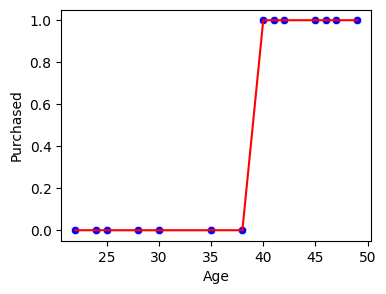

In [24]:
#Binary 
data=pd.read_csv(r'C:\python\ml\datasets\LogisticRegression.csv')
data.drop(columns=["Salary"],inplace=True)
data
plt.figure(figsize=(4,3))
sns.scatterplot(x="Age",y="Purchased",data=data)
x=data[["Age"]]
y=data["Purchased"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)*100
print(lr.predict([[41]]))
sns.scatterplot(x="Age",y="Purchased",data=data,color="blue")
sns.lineplot(x="Age",y=lr.predict(x),data=data,color="red")
plt.show()

c:\Users\Nikhil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\Nikhil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


[1]


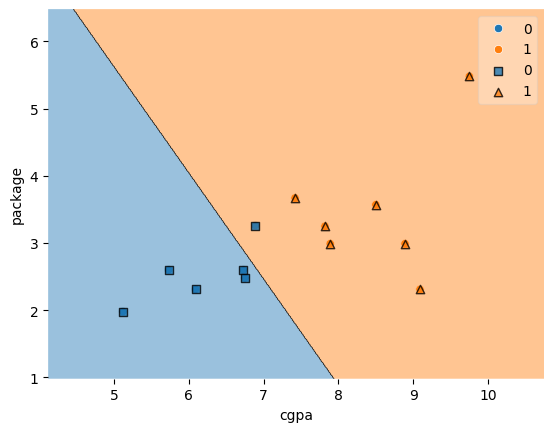

In [13]:
# (Binary Classification) (Multiple input) 
data=pd.read_csv(r"C:\python\ml\datasets\binarylogistic.csv")
sns.scatterplot(x="cgpa",y="package",data=data,hue="placed")#hue defines linearly separable or not
x=data.iloc[:,:-1]
y=data["placed"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.2,random_state=20)
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)*100
print(lr.predict([[9,2.6]]))
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=lr)
plt.show()

c:\Users\Nikhil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Axes: xlabel='data1', ylabel='data2'>

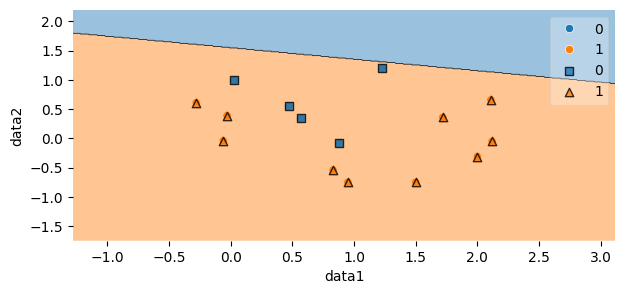

In [14]:
# Linear only (Binary Classification) (Polynomial input) 
data=pd.read_csv(r"C:\python\ml\datasets\polynomialclassification.csv")
plt.figure(figsize=(7,3))
sns.scatterplot(x="data1",y="data2",data=data,hue="Output")
from sklearn.model_selection import train_test_split
x=data.iloc[:,:-1]
y=data["Output"]
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.5,random_state=20)
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)*100
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=lr)

In [15]:
# PolynomialFeatures (Binary Classification) (Polynomial input) 
from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(degree=2)
x=data.iloc[:,:-1]

y=data["Output"]
pf.fit(x)
x=pd.DataFrame(pf.transform(x))
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.5,random_state=20)
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)*100


62.5

Logistic Regression (practical) (Multiclass Classification) 

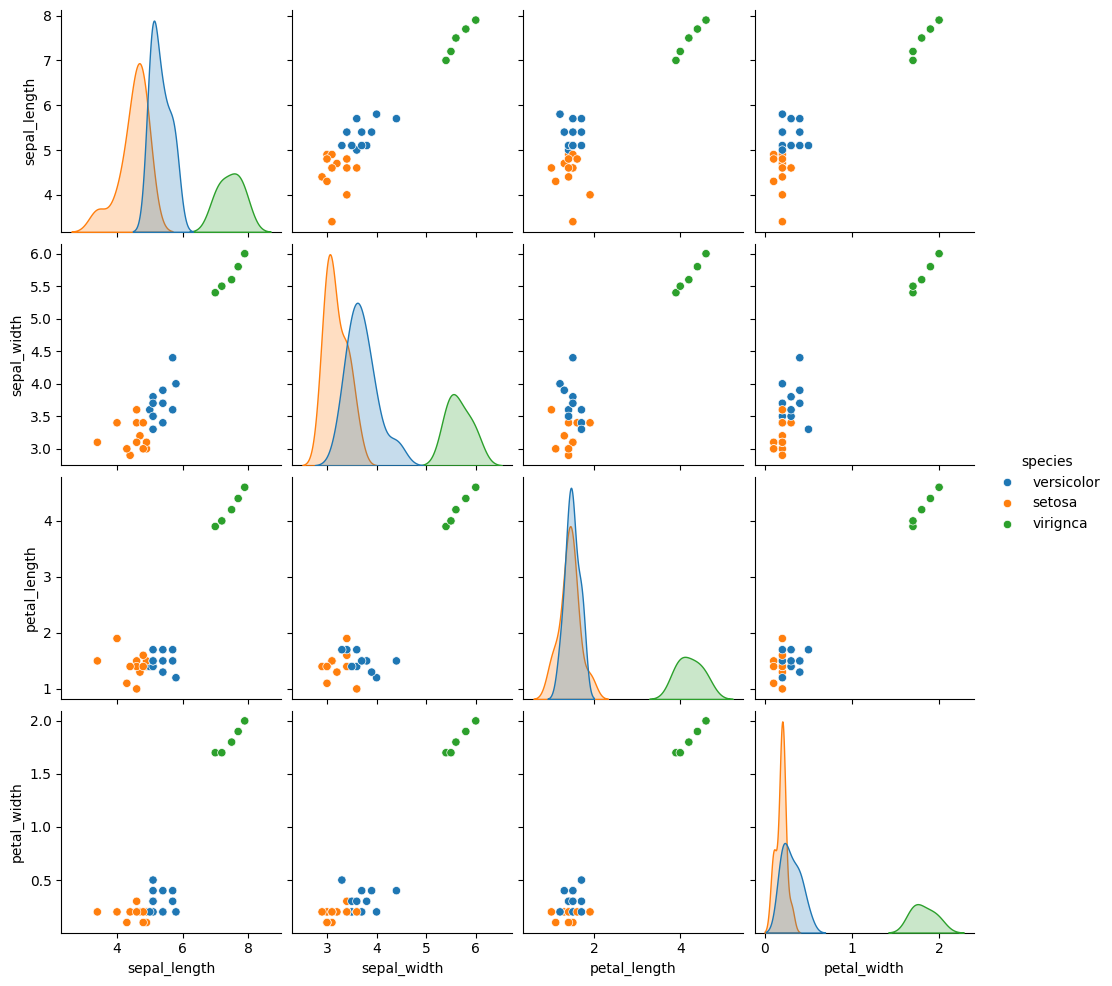

In [ ]:
data=pd.read_csv(r"C:\python\ml\datasets\iris.csv")
sns.pairplot(data=data,hue="species")   
plt.show()

In [ ]:
x=data.iloc[:,:-1]
y=data["species"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.5,random_state=20)
 
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(multi_class="ovr")
lr.fit(x_train,y_train)
print(lr.score(x_test,y_test)*100)
lrl=LogisticRegression(multi_class="multinomial")
lrl.fit(x_train,y_train)
print(lrl.score(x_test,y_test)*100)

73.33333333333333
86.66666666666667


c:\Users\Nikhil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Nikhil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


confusion matrix

Accuracy: 57.14285714285714
Confusion Matrix:
 [[2 3]
 [0 2]]
Precision: 40.0
Recall: 100.0
F1 Score: 57.14285714285714


<Axes: >

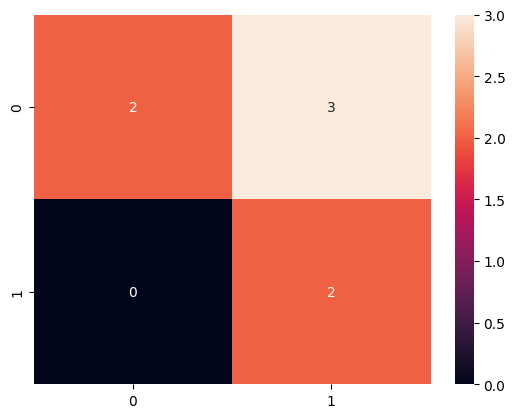

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  # Use logistic, not linear
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Load the data
data = pd.read_csv(r"C:\python\ml\datasets\binarylogistic.csv")
x = data.iloc[:, :-1]
y = data["placed"]

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.5, random_state=20)

# Logistic Regression model

lr = LogisticRegression()
lr.fit(x_train, y_train)

# Accuracy
accuracy = lr.score(x_test, y_test) * 100
print("Accuracy:", accuracy)

# Predictions
y_pred = lr.predict(x_test)

# Metrics
cf=confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cf)
print("Precision:", precision_score(y_test, y_pred)*100)
print("Recall:", recall_score(y_test, y_pred)*100)
print("F1 Score:", f1_score(y_test, y_pred)*100)

sns.heatmap(cf,annot=True)

Imbalanced data

In [19]:
from sklearn.model_selection import train_test_split
data=pd.read_csv(r"C:\python\ml\datasets\LogisticRegression.csv")
data["Purchased"].value_counts()
x=data.iloc[:,:-1]
y=data["Purchased"]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.5, random_state=20)

from sklearn.linear_model import LogisticRegression  
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr.score(x_test,y_test)*100
lr.predict([[45,26000]])

c:\Users\Nikhil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [20]:
from imblearn.under_sampling import RandomUnderSampler
ru=RandomUnderSampler()
ru_x,ru_y=ru.fit_resample(x,y)
ru_y.value_counts()
x_train, x_test, y_train, y_test = train_test_split(ru_x, ru_y, train_size=0.5, random_state=20)

from sklearn.linear_model import LogisticRegression  
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr.score(x_test,y_test)*100
lr.predict([[19,19000]])

c:\Users\Nikhil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [21]:
from imblearn.over_sampling import RandomOverSampler
ro=RandomOverSampler()
ro_x,ro_y=ro.fit_resample(x,y)
ro_y.value_counts()
x_train, x_test, y_train, y_test = train_test_split(ro_x, ro_y, train_size=0.5, random_state=20)

from sklearn.linear_model import LogisticRegression  
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr.score(x_test,y_test)*100
lr.predict([[19,19000]])

c:\Users\Nikhil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

Naive bayes


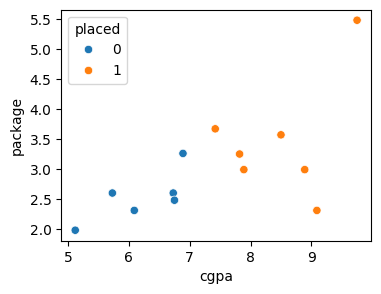

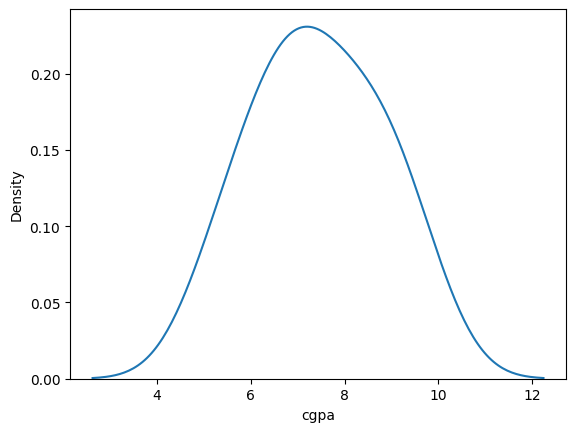

In [22]:
data=pd.read_csv(r"C:\python\ml\datasets\binarylogistic.csv")
data
plt.figure(figsize=(4,3))
sns.scatterplot(x="cgpa",y="package",data=data,hue="placed")
plt.show()
x=data.iloc[:,:-1]
y=data["placed"]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.5, random_state=20)
sns.kdeplot(data=data["cgpa"])
plt.show()

28.57142857142857
28.57142857142857
28.57142857142857


c:\Users\Nikhil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


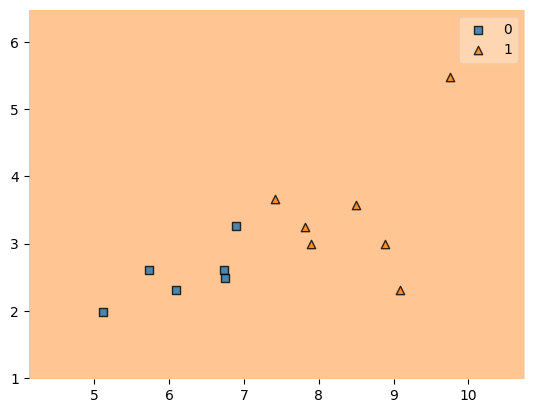

c:\Users\Nikhil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


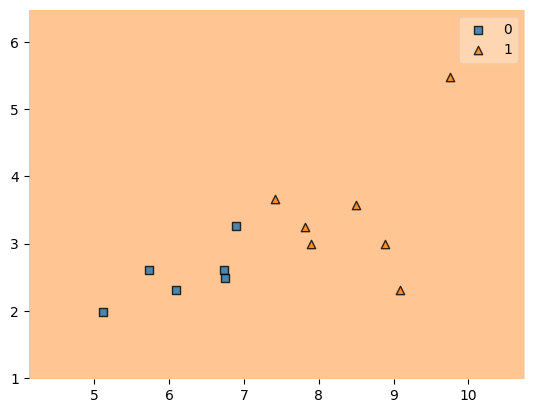

c:\Users\Nikhil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


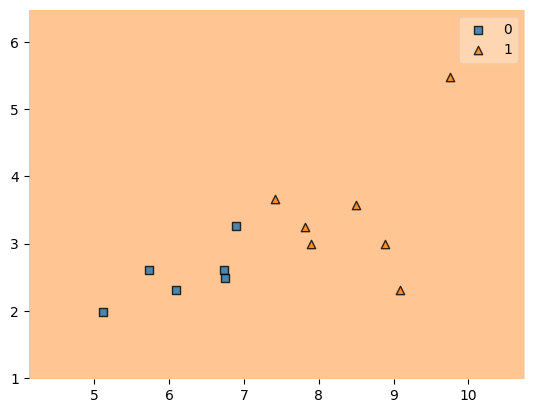

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
print(gnb.score(x_test,y_test)*100)
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
print(mnb.score(x_test,y_test)*100)
bnb=BernoulliNB()
bnb.fit(x_train,y_train)
print(bnb.score(x_test,y_test)*100)
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=gnb)
plt.show()
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=mnb)
plt.show()
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=bnb)
plt.show() 